# Egzaminas

### Užduotis

1. Naudojant `pandas` biblioteką nuskaitykite duotą duomenų failą ir atvaizduokite duomenis.

In [ ]:
# Kodą rašykite čia...
import pandas as pd

df = pd.read_csv('Miglė.csv', encoding='utf-8')
df

2. Pridėkite naują stulpelį `Vidurkis` ir suskaičiuokite kiekvieno studento vidurkį bei suapvalinkit iki vieno skaičiaus po kablelio.

In [ ]:
# Kodą rašykite čia...
df['Vidurkis'] = df[['Matematika', 'Fizika', 'Biologija', 'Chemija', 'Istorija', 'Geografija', 'Lietuvių kalba', 'Anglų kalba', 'Informatika', 'Ekonomika', 'Kūno kultūra', 'Muzika', 'Dailė', 'Technologijos']].mean(axis = 1).round(1)
df

# df['Vidurkis'] = df.loc[:, 'Matematika':'Technologijos'].mean(axis=1).round(1)
# df

3. Suraskite ir atspausdinkite geriausio studento vardą ir pavardę bei jo vidurkį.


In [ ]:
# Kodą rašykite čia...
geriausias = df.sort_values('Vidurkis').tail(1)
geriausias

print(f'{geriausias['Vardas'].values[0]} {geriausias['Pavardė'].values[0]}, Vidurkis: {geriausias['Vidurkis'].values[0]}')

4. Pakeiskite geriausio studento vardą ir pavardę į savo ir atspausdinkite kelis įrašus, kad matytusi pakeitimas.

In [ ]:
# Kodą rašykite čia...
df.loc[9, 'Vardas'] = 'Miglė'
df.loc[9, 'Pavardė'] = 'Timofejevaitė'
df

5. Sukurkite funkciją `stipendija_pagal_vidurki`, kuri priimtų studento vidurkį (kaip argumentą) ir grąžintų jam skirtos stipendijos dydį (`int` tipo skaičių) pagal jo vidurkį.
    * Kai vidurkis didesnis arba lygus 9.5 stipendija 200
    * Kai vidurkis didesnis arba lygus 9.0, bet mažesnis už 9.5 stipendija 180
    * Kai vidurkis didesnis arba lygus 8.5, bet mažesnis už 9.0 stipendija 100
    * Jei vidurkis mažesnis už 8.5 studentas stipendijos negauna (0)


In [8]:
# Kodą rašykite čia...
def stipendija_pagal_vidurki(vidurkis):
    if vidurkis >= 9.5:
        return 200
    elif vidurkis >= 9:
        return 180
    elif vidurkis >= 8.5:
        return 100
    else:
        return 0

6. Pridėkite naują stulpelį `Stipendija` ir stulpelį užpildykite duomenimis naudodami funkciją `stipendija_pagal_vidurki` pagal studento vidirkį.

In [ ]:
# Kodą rašykite čia...
df['Stipendija'] = df['Vidurkis'].apply(stipendija_pagal_vidurki)
df

7. Suskaičiuokite, kiek studentų kokią stipendiją gauna ir atspausdinkite rezultatą. <span style="color:red">Atvaizduokite rezultatus pie diagramoje.</span>

In [ ]:
# Kodą rašykite čia...
df['Stipendija'].value_counts()

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [16, 5]

stipendijos_sk = df['Stipendija'].value_counts()

kategorijos = stipendijos_sk.index.astype(str)
reiksmes = stipendijos_sk.values

def procentai_ir_reiksmes(x):
    return f'{x:.1f}%\n{int(x * stipendijos_sk.sum() / 100)}'

plt.pie(reiksmes, labels=kategorijos, autopct=procentai_ir_reiksmes)
plt.title("Skiriamų stipendijų kiekis")
plt.show()

8. Suskaičiuokite studentus pagal lytį ir aspausdinkite rezultatą. <span style="color:red">Atvaizduokite rezultatą stulpelinėje diagramoje.</span>

In [ ]:
# Kodą rašykite čia...
df['Lytis'] = df['Pavardė'].str[-1]
df

In [ ]:
df['Lytis'] = df['Lytis'].replace('s', 'Vyras')
df['Lytis'] = df['Lytis'].replace('ė', 'Moteris')

df['Lytis'].value_counts()

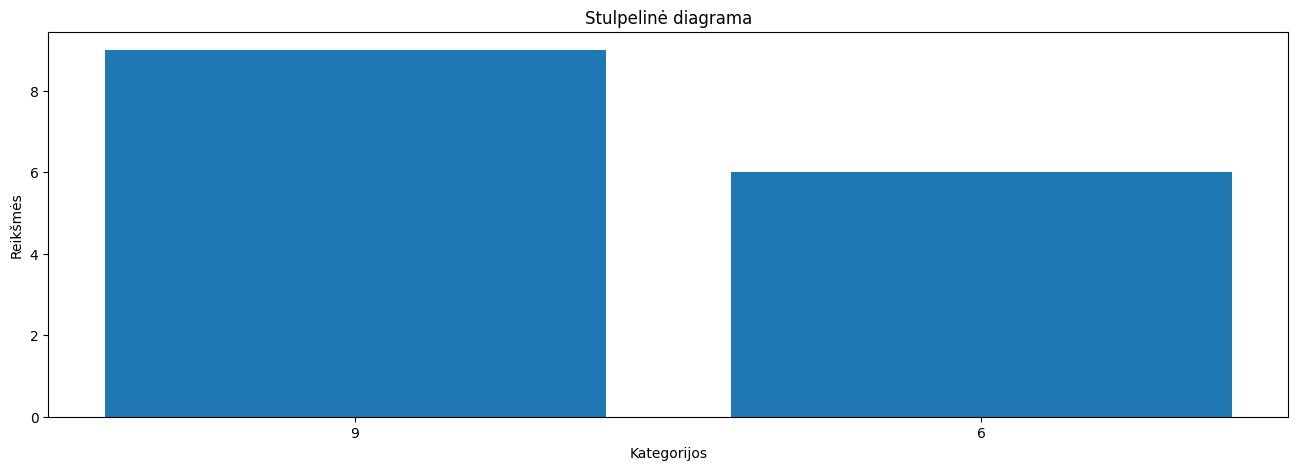

In [13]:
Lytys = df['Lytis'].value_counts()

kategorijos = Lytys.astype(str)
reiksmes = Lytys.values

plt.bar(kategorijos, reiksmes)
plt.title("Stulpelinė diagrama")
plt.xlabel("Kategorijos")
plt.ylabel("Reikšmės")
plt.show()